In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (7,7)
import numpy as np

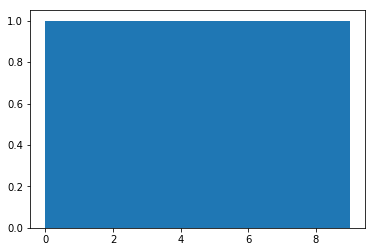

In [2]:
plt.hist(np.arange(10))
plt.show()

In [3]:
from __future__ import print_function
import time, os, glob
import ROOT
from array import array
from root_numpy import hist2array

Welcome to JupyROOT 6.20/02


In [21]:
regions = ['sr', 'sb', 'sblo', 'sbhi']
#regions = ['sr']
pt = {}
#Run2017B-F_region_sblo_blind_None_selected_phoEt_list.txt
for r in regions:
    in_files = glob.glob('Templates/Run2017B-F_region_%s_blind_None_selected_phoEt_list.txt'%r)
    print(in_files)
    
    pt[r] = []
    for in_file in in_files:
        f = open(in_file, "r")
        for i,l in enumerate(f):
            pt0_, pt1_ = l.replace('\n','').split(':')
            pt[r].append([float(pt0_), float(pt1_)])
            #if i > 10000: break

    pt[r] = np.array(pt[r])
    print(pt[r][:5])
    print(len(pt[r]))

['Templates/Run2017B-F_region_sr_blind_None_selected_phoEt_list.txt']
[[82.115845 44.247128]
 [75.725586 50.391171]
 [67.75985  29.983433]
 [47.604828 31.643906]
 [73.852661 48.185333]]
167218
['Templates/Run2017B-F_region_sb_blind_None_selected_phoEt_list.txt']
[[ 54.077515  43.624519]
 [ 61.857235  28.981277]
 [ 71.906158  38.974968]
 [ 36.933632  31.166088]
 [113.615288  64.203476]]
188747
['Templates/Run2017B-F_region_sblo_blind_None_selected_phoEt_list.txt']
[[54.077515 43.624519]
 [61.857235 28.981277]
 [71.906158 38.974968]
 [36.933632 31.166088]
 [69.10659  37.696346]]
128866
['Templates/Run2017B-F_region_sbhi_blind_None_selected_phoEt_list.txt']
[[113.615288  64.203476]
 [ 92.737778  76.954468]
 [ 51.167088  43.426243]
 [100.659973  52.972382]
 [151.822876  39.755383]]
59881


In [22]:
print(pt['sr'].shape)
print(pt['sblo'].shape)
pt['srsblo'] = np.concatenate([pt['sr'], pt['sblo']])
print(pt['srsblo'].shape)
pt['srsblo'] = pt['srsblo'][pt['srsblo'][:,0]>110./3.]
pt['srsblo'] = pt['srsblo'][pt['srsblo'][:,1]>110./4.]
print(pt['srsblo'].shape)

(167218, 2)
(128866, 2)
(296084, 2)
(287102, 2)


In [23]:
print(pt['sr'].shape)
print(pt['sbhi'].shape)
pt['srsbhi'] = np.concatenate([pt['sr'], pt['sbhi']])
print(pt['srsbhi'].shape)
pt['srsbhi'] = pt['srsbhi'][pt['srsbhi'][:,0]>110./3.]
pt['srsbhi'] = pt['srsbhi'][pt['srsbhi'][:,1]>110./4.]
print(pt['srsbhi'].shape)

(167218, 2)
(59881, 2)
(227099, 2)
(227099, 2)


In [24]:
wd, ht = int(440*1), int(400*1)

pt_bins_ = {}
dPt = 1
pt_bins_[0] = np.arange(25,225+dPt,dPt)
'''
pt_bins_[0] = np.arange(25,100,dPt)
dPt = 5
pt_bins_[1] = np.arange(100,120,dPt)
dPt = 20
pt_bins_[2] = np.arange(120,200,dPt)
#dPt = 750-200
#pt_bins_[3] = np.arange(200,750+dPt,dPt)
'''
pt_bins = np.concatenate([pt_bin_ for pt_bin_ in pt_bins_.values()])
n_pt_bins = len(pt_bins)-1
pt_bins = array('d', list(pt_bins))
print(n_pt_bins)

200


In [25]:
c, h = {}, {}

key = 'pt0vpt1'
#regions = ['sr', 'srsblo', 'sblo']
regions = ['sblo', 'sbhi', 'sb', 'sr', 'srsblo', 'srsbhi']
for r in regions:
    k = key+r
    print(r)
    #'''
    
    c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)
    h[k] = ROOT.TH2F(k, k, n_pt_bins, pt_bins, n_pt_bins, pt_bins)
    #'''
    r_ = r.replace('shift','')
    for i in range(len(pt[r_])):
        if 'shift' in r:
            h[k].Fill(pt[r_][i][0]+20., pt[r_][i][1]+10.)
        else:
            h[k].Fill(pt[r_][i][0], pt[r_][i][1])

sblo
sbhi
sb
sr
srsblo
srsbhi


In [81]:
'''for ix in range(1, h[key+'srshift'].GetNbinsX()+1):
    for iy in range(1, h[key+'srshift'].GetNbinsY()+1):
        binc = h[key+'srshift'].GetBinContent(ix, iy)
        if binc == 0.: h[key+'srshift'].SetBinContent(ix, iy, 1.)'''

['pt0vpt1sr', 'pt0vpt1srsblo', 'pt0vpt1sblo', 'pt0vpt1srsbhi', 'pt0vpt1sb', 'pt0vpt1sbhi']


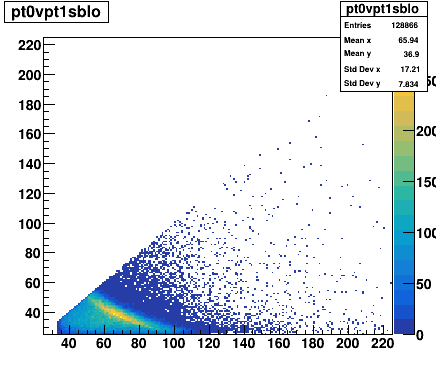

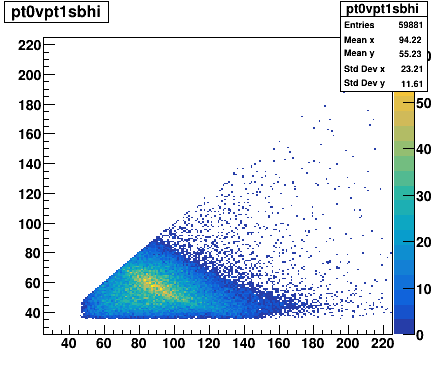

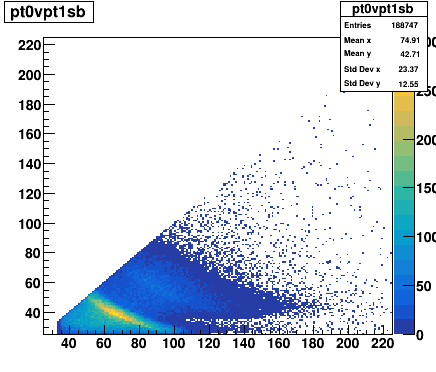

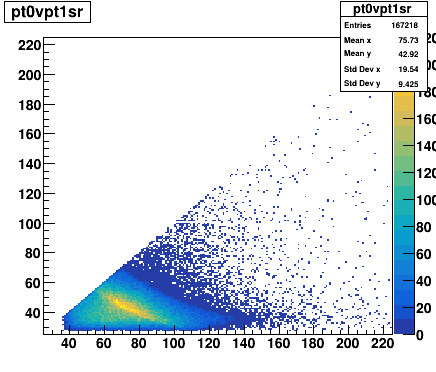

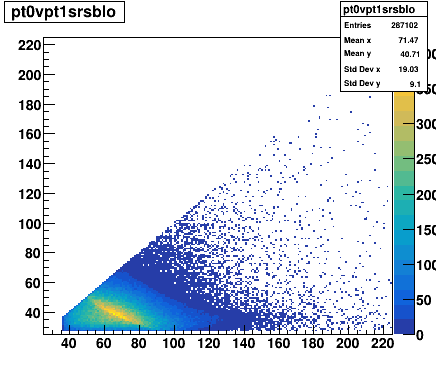

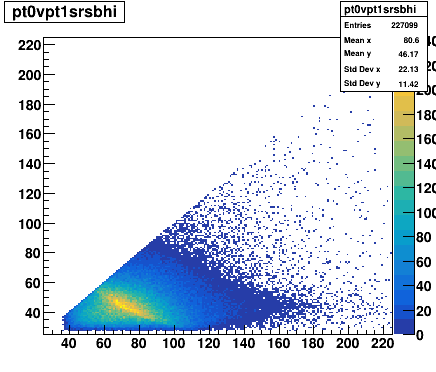

In [26]:
print(h.keys())
for r in regions:
    k = key+r
    c[k].cd()
    #if 'shift' in r:
    #    h[k].Multiply(h[key+'sr'])
    h[k].Draw("COLZ")
    c[k].Draw()

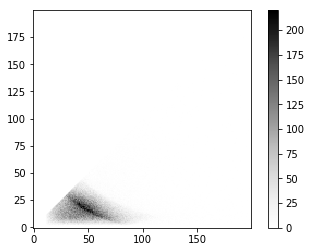

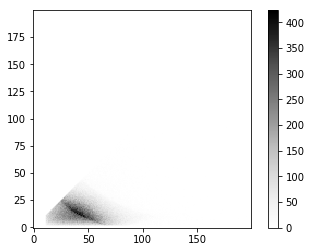

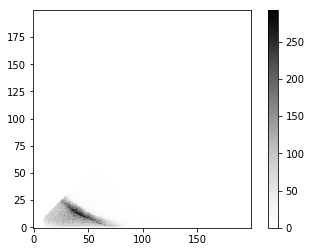

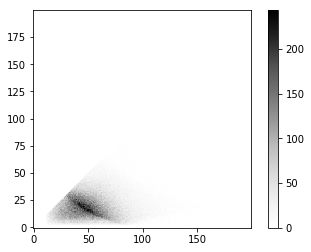

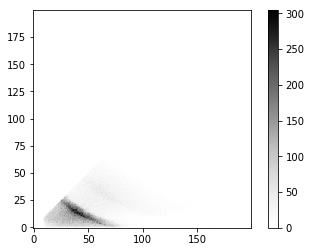

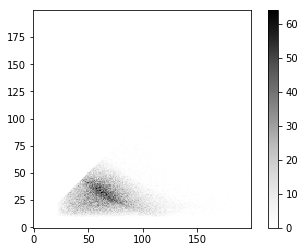

In [27]:
img = {}
for k in h.keys():
    ratio, pt_edges = hist2array(h[k], return_edges=True)
    ratio, pt_edges = ratio.T, pt_edges[0]
    img[k] = ratio

    plt.imshow(img[k], origin='lower', cmap='Greys')
    plt.colorbar()
    plt.show()

In [29]:
from skimage.measure import block_reduce
from skimage.transform import rescale
from numpy.lib.stride_tricks import as_strided

def upsample_arr(x, b0, b1):

    r, c = x.shape                                    # number of rows/columns
    rs, cs = x.strides                                # row/column strides
    x = as_strided(x, (r, b0, c, b1), (rs, 0, cs, 0)) # view as a larger 4D array

    return x.reshape(r*b0, c*b1)/(b0*b1)            # create new 2D array with same total occupancy 

def resample_arr(img, factor=2, func=np.sum, alias=False):
    if not alias:
        img_reduced = block_reduce(img, block_size=(factor, factor), func=func) # downsample by summing over [factor, factor] window
    else:
        img_reduced = rescale(img, 1./factor, anti_aliasing=True)
    img_resampled = upsample_arr(img_reduced, factor, factor)
    #if func == np.sum:
    #    img_resampled /= (factor*factor)
    return img_resampled


In [30]:
from collections import OrderedDict

imgr = OrderedDict()
imgm = OrderedDict()

'''
factors = [2, 4, 20]
funcs = [np.sum, np.sum, np.sum]
threshs = [1000., 1., 0.1]
for k in [kratio]:
'''
#factors = [2, 4, 5, 25]#, [2,4,5,25]
#funcs = [np.sum, np.sum, np.sum, np.sum]
#threshs = [100, 25., 5., 0.1]# [100.,25.,5.,.5]
factors = [2, 4, 5, 20, 25]
threshs = [100., 10., 2., 1., 0.1]
#factors = [2, 4, 25]
#funcs = [np.sum, np.sum]
#threshs = [10., 5., 1.]
for k in img.keys():
    print(k)
    imgm[k] = img[k].copy()
    #print(img[k].shape)
    for i,factor in enumerate(factors):
        kf = k+str(factor)
        imgr[kf] = img[k].copy()
        imgr[kf] = resample_arr(imgr[kf], factor=factor, func=np.sum)
        #if i == 2: continue
        imgm[k][imgm[k] < threshs[i]] = imgr[k+str(factors[i])][imgm[k] < threshs[i]]

pt0vpt1sr
pt0vpt1srsblo
pt0vpt1sblo
pt0vpt1srsbhi
pt0vpt1sb
pt0vpt1sbhi


pt0vpt1sra2h
pt0vpt1srsbloa2h
pt0vpt1sbloa2h
pt0vpt1srsbhia2h
pt0vpt1sba2h
pt0vpt1sbhia2h


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cpt0vpt1sra2h
Warning in <TROOT::Append>: Replacing existing TH1: pt0vpt1sra2h (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cpt0vpt1srsbloa2h
Warning in <TROOT::Append>: Replacing existing TH1: pt0vpt1srsbloa2h (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cpt0vpt1sbloa2h
Warning in <TROOT::Append>: Replacing existing TH1: pt0vpt1sbloa2h (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cpt0vpt1srsbhia2h
Warning in <TROOT::Append>: Replacing existing TH1: pt0vpt1srsbhia2h (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cpt0vpt1sba2h
Warning in <TROOT::Append>: Replacing existing TH1: pt0vpt1sba2h (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cpt0vpt1sbhia2h
Warning in <TROOT::Append>: Replacing exis

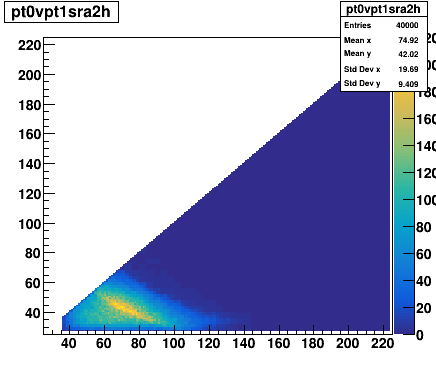

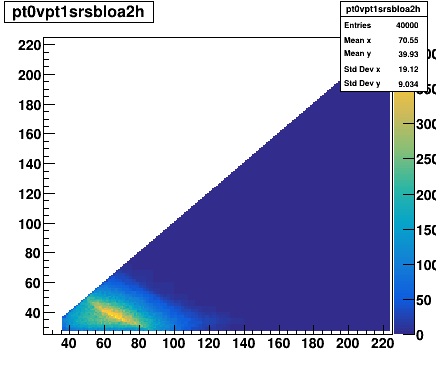

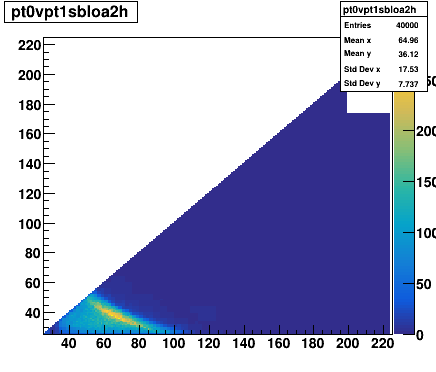

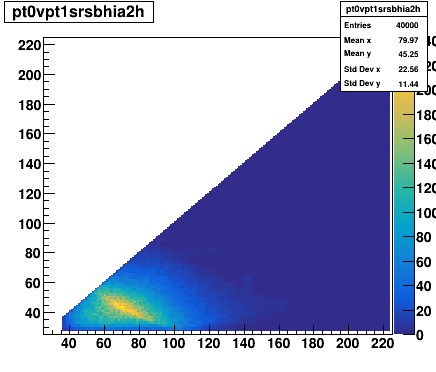

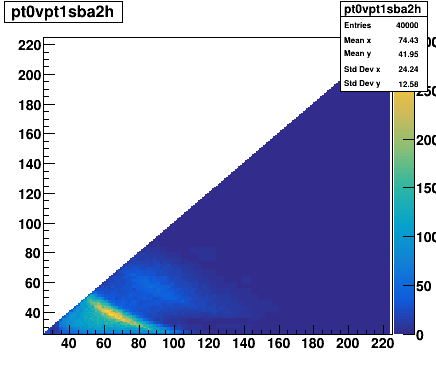

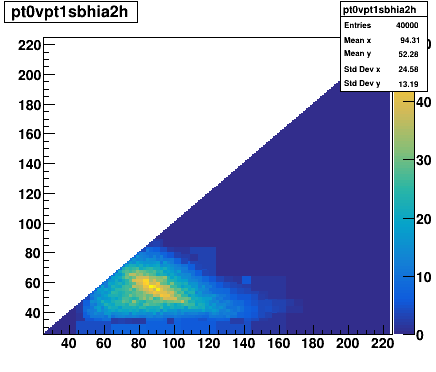

In [34]:
#for k in ks:
#print(imgm.keys())
for k in imgm.keys():
    kh = k+'a2h'
    print(kh)
    c[kh] = ROOT.TCanvas("c%s"%kh, "c%s"%kh, wd, ht)
    h[kh] = ROOT.TH2F(kh, kh, n_pt_bins, pt_bins, n_pt_bins, pt_bins)
    ib = 0
    for ix in range(1, h[kh].GetNbinsX()+1):
        for iy in range(1, h[kh].GetNbinsY()+1):
            binc = imgm[k][iy-1,ix-1]
            if iy > ix:
                binc = 0.
            #if k == ksrc:
            #    mlead_low = h[kh].GetXaxis().GetBinLowEdge(ix)
            #    msublead_low = h[kh].GetYaxis().GetBinLowEdge(iy)
            #    if mlead_low < 140./3.: binc = 0.
            #    if msublead_low < 140./4.: binc = 0.
            #if k == ktgt or k == kratio:
            if 'sr' in k:
                #if ib == print(h[kh].GetXaxis().GetBinLowEdge(ix))
                mlead_low = h[kh].GetXaxis().GetBinLowEdge(ix)
                msublead_low = h[kh].GetYaxis().GetBinLowEdge(iy)
                if mlead_low < 110./3.: binc = 0.
                if msublead_low < 110./4.: binc = 0.
            #if k == kratio:
            #    pass
            #    #h[kh].SetMaximum(10.)
            h[kh].SetBinContent(ix-1, iy-1, binc)
            ib += 1
    #h[kh].SetMaximum(10.)
    h[kh].SetContour(100)
    h[kh].Draw("COLZ")
    c[kh].Draw()

pt-ratio:
0.02910363 20.682781 0.49700624 1.0902364
Weights/Run2017B-F_sb2sr_resample_blind_None_ptwgts.npz
pt-ratio:
0.033893663 12.5342455 0.37764794 0.71150786
Weights/Run2017B-F_sb2srsblo_resample_blind_None_ptwgts.npz
pt-ratio:
0.021434095 15.773603 0.6505312 0.97044224
Weights/Run2017B-F_sb2srsbhi_resample_blind_None_ptwgts.npz


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cpt0vpt1srosba2hresample
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cpt0vpt1srsbloosba2hresample
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cpt0vpt1srsbhiosba2hresample


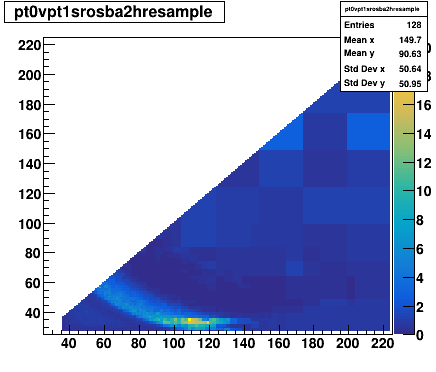

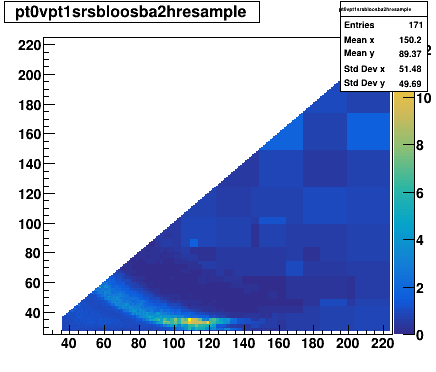

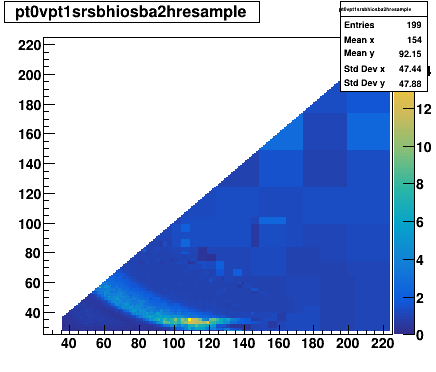

In [39]:
tgts = ['sr', 'srsblo', 'srsbhi']
src = 'sb'
for tgt in tgts:
    ksrc = key+src+'a2h'+'resample'
    ktgt = key+tgt+'a2h'+'resample'
    kratio = key+tgt+'o'+src+'a2h'+'resample'

    h[ktgt] = h[key+tgt+'a2h'].Clone()
    h[ktgt].SetName(ktgt)
    h[ktgt].SetTitle(ktgt)
    h[ksrc] = h[key+src+'a2h'].Clone()
    h[ksrc].SetName(ksrc)
    h[ksrc].SetTitle(ksrc)

    h[ktgt].Scale(1.e5/h[key+tgt].Integral())
    h[ksrc].Scale(1.e5/h[key+src].Integral())

    h[kratio] = h[ktgt].Clone()
    h[kratio].SetName(kratio)
    h[kratio].SetTitle(kratio)
    h[kratio].Divide(h[ksrc])

    c[kratio] = ROOT.TCanvas("c%s"%kratio,"c%s"%kratio,wd,ht)
    #print(h[kratio].Integral())
    #h[kratio].SetMaximum(10.)
    h[kratio].SetContour(100)
    h[kratio].Draw("COLZ")
    c[kratio].Draw()

    # hist2array().T origin @ lower left + (row, col) <=> (iy, ix)
    # NOTE: hist2array() drops uflow and ovflow bins => idx -> idx-1
    # row:sublead, col:lead
    ratio, pt_edges = hist2array(h[kratio], return_edges=True)
    ratio, pt_edges = ratio.T, pt_edges[0]
    
    # Remove unphysical values
    #ratio[ratio==0.] = 0.
    ratio[np.isnan(ratio)] = 1.
    print('pt-ratio:')
    print(ratio[ratio>0.].min(), ratio.max(), np.mean(ratio), np.std(ratio))

    # Write out weights to numpy file
    #Run2017B-F_sb2sr_blind_None_ptwgts.npz
    fstr = "%s/%s_%s2%s_resample_blind_%s_ptwgts.npz"%('Weights', 'Run2017B-F', 'sb', tgt, None)
    print(fstr)
    np.savez(fstr, pt_edges=pt_edges, pt_wgts=ratio)